# Random Forest Regression

## Importing the libraries

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [125]:
dataset = pd.read_csv('/content/out_tall_cleaned.csv')
dataset=dataset.drop(dataset.columns[1], axis=1)

In [126]:
titles=list(dataset.columns)
print(titles)

['Unnamed: 0', 'Patella_PN', 'Femur_PN', 'Tibia_PN', 'Patella_Car_PN', 'Femur_Car_PN', 'Tibia_M_Car_PN', 'Tibia_L_Car_PN', 'Patella_volume', 'Femur_volume', 'Tibia_volume', 'Patella_Car_volume', 'Femur_Car_volume', 'Tibia_M_Car_volume', 'Tibia_L_Car_volume', 'Patella_bounds_x', 'Femur_bounds_x', 'Tibia_bounds_x', 'Patella_Car_bounds_x', 'Femur_Car_bounds_x', 'Tibia_M_Car_bounds_x', 'Tibia_L_Car_bounds_x', 'Patella_bounds_y', 'Femur_bounds_y', 'Tibia_bounds_y', 'Patella_Car_bounds_y', 'Femur_Car_bounds_y', 'Tibia_M_Car_bounds_y', 'Tibia_L_Car_bounds_y', 'Patella_bounds_z', 'Femur_bounds_z', 'Tibia_bounds_z', 'Patella_Car_bounds_z', 'Femur_Car_bounds_z', 'Tibia_M_Car_bounds_z', 'Tibia_L_Car_bounds_z', 'Simulation_len', 'Max_dist_femur_tibia_lat_car', 'Min_dist_femur_tibia_lat_car', 'Mean_dist_femur_tibia_lat_car', 'Max_dist_femur_tibia_med_car', 'Min_dist_femur_tibia_med_car', 'Mean_dist_femur_tibia_med_car', 'frame', 'Max_tib_med_contact_pressure', 'Max_tib_lat_contact_pressure']


In [127]:
titles[43],titles[44] = titles[44], titles[43]
titles[44],titles[45] = titles[45], titles[44]
titles

['Unnamed: 0',
 'Patella_PN',
 'Femur_PN',
 'Tibia_PN',
 'Patella_Car_PN',
 'Femur_Car_PN',
 'Tibia_M_Car_PN',
 'Tibia_L_Car_PN',
 'Patella_volume',
 'Femur_volume',
 'Tibia_volume',
 'Patella_Car_volume',
 'Femur_Car_volume',
 'Tibia_M_Car_volume',
 'Tibia_L_Car_volume',
 'Patella_bounds_x',
 'Femur_bounds_x',
 'Tibia_bounds_x',
 'Patella_Car_bounds_x',
 'Femur_Car_bounds_x',
 'Tibia_M_Car_bounds_x',
 'Tibia_L_Car_bounds_x',
 'Patella_bounds_y',
 'Femur_bounds_y',
 'Tibia_bounds_y',
 'Patella_Car_bounds_y',
 'Femur_Car_bounds_y',
 'Tibia_M_Car_bounds_y',
 'Tibia_L_Car_bounds_y',
 'Patella_bounds_z',
 'Femur_bounds_z',
 'Tibia_bounds_z',
 'Patella_Car_bounds_z',
 'Femur_Car_bounds_z',
 'Tibia_M_Car_bounds_z',
 'Tibia_L_Car_bounds_z',
 'Simulation_len',
 'Max_dist_femur_tibia_lat_car',
 'Min_dist_femur_tibia_lat_car',
 'Mean_dist_femur_tibia_lat_car',
 'Max_dist_femur_tibia_med_car',
 'Min_dist_femur_tibia_med_car',
 'Mean_dist_femur_tibia_med_car',
 'Max_tib_med_contact_pressure',
 'Ma

In [128]:
dataset = dataset[titles]
dataset

,Unnamed: 0,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,Femur_volume,...,Simulation_len,Max_dist_femur_tibia_lat_car,Min_dist_femur_tibia_lat_car,Mean_dist_femur_tibia_lat_car,Max_dist_femur_tibia_med_car,Min_dist_femur_tibia_med_car,Mean_dist_femur_tibia_med_car,Max_tib_med_contact_pressure,Max_tib_lat_contact_pressure,frame
0,0,1137,4142,2789,5275,21420,2840,2840,33682.157434,231437.991665,...,0,13.941570,0.987391,6.105886,10.304892,1.376902,4.580906,7.619495,6.696390,0
1,1,1137,4142,2789,5275,21420,2840,2840,33682.157434,231437.991665,...,0,13.941570,0.987391,6.105886,10.304892,1.376902,4.580906,8.068417,5.042103,1
2,2,1137,4142,2789,5275,21420,2840,2840,33682.157434,231437.991665,...,0,13.941570,0.987391,6.105886,10.304892,1.376902,4.580906,7.796326,5.344840,2
3,3,1137,4142,2789,5275,21420,2840,2840,33682.157434,231437.991665,...,0,13.941570,0.987391,6.105886,10.304892,1.376902,4.580906,8.058777,6.240049,3
4,4,1137,4142,2789,5275,21420,2840,2840,33682.157434,231437.991665,...,0,13.941570,0.987391,6.105886,10.304892,1.376902,4.580906,8.098284,7.306662,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,40724,873,3921,2831,5690,21495,2840,2840,24799.135262,226161.340527,...,12,18.862473,2.616759,6.815766,15.943200,2.833736,6.482209,11.455851,7.974414,236
37006,40725,873,3921,2831,5690,21495,2840,2840,24799.135262,226161.340527,...,12,18.862473,2.616759,6.815766,15.943200,2.833736,6.482209,11.642740,8.043670,237
37007,40726,873,3921,2831,5690,21495,2840,2840,24799.135262,226161.340527,...,12,18.862473,2.616759,6.815766,15.943200,2.833736,6.482209,12.039758,8.359842,238
37008,40727,873,3921,2831,5690,21495,2840,2840,24799.135262,226161.340527,...,12,18.862473,2.616759,6.815766,15.943200,2.833736,6.482209,11.383085,8.170403,239


In [271]:
# X = dataset.iloc[0:40727, 45:46].values
# # y = dataset.iloc[0:40727, 40:46]
# # y = dataset.iloc[0:40727, 40:45].values
# y = dataset.iloc[0:40727, 44:45]


# print(y)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

       Max_tib_lat_contact_pressure
0                          6.696390
1                          5.042103
2                          5.344840
3                          6.240049
4                          7.306662
...                             ...
37005                      7.974414
37006                      8.043670
37007                      8.359842
37008                      8.170403
37009                      8.193823

[37010 rows x 1 columns]


In [334]:
X = dataset.iloc[0:40727, 45:46].values
# y = dataset.iloc[0:40727, 40:46]
# y = dataset.iloc[0:40727, 40:45].values
y = dataset.iloc[0:40727, 43:44].values


print(max(y))
# print((y))

# y = dataset.iloc[0:40727, 43:44]
# print(y)


y = dataset.iloc[0:40727, 44:45].values
print(max(y))


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

[99.6297226]
       Max_tib_med_contact_pressure
0                          7.619495
1                          8.068417
2                          7.796326
3                          8.058777
4                          8.098284
...                             ...
37005                     11.455851
37006                     11.642740
37007                     12.039758
37008                     11.383085
37009                     11.772991

[37010 rows x 1 columns]
[99.79545593]


In [272]:
# dataset = pd.read_csv('/content/out_tall_cleaned.csv')

# dataset=dataset.drop(dataset.columns[1], axis=1)
# # X = dataset.iloc[:, 26:].values
# # y = dataset.iloc[:, 2:25].values

# # X = dataset.iloc[0:-1, 2:25].values
# # y = dataset.iloc[0:-1, 27:-1].values

# # X = dataset.iloc[:, 1:-1].values
# # y = dataset.iloc[:, -1].values


# # X = dataset.iloc[0:40727, 43:44].values
# # print(X)
# # y = dataset.iloc[0:40727, 2:42].values
# # print(y)



# X = dataset.iloc[0:40727, 43:44]
# # print(X)
# # Try to include other data as well
# # y = dataset.iloc[0:40727, 44:46]
# y = dataset.iloc[0:40727, 44:46]

# # y=  dataset.iloc[0:40727, 1:43]
# # y = dataset.loc[[ : ,'Max_tib_lat_contact_pressure'],[:,'Max_tib_med_contact_pressure']]

# # y = dataset.loc[ :,'Max_tib_lat_contact_pressure'], [: , 'Max_tib_med_contact_pressure']
# # y = dataset.loc[ :,'Max_tib_med_contact_pressure']

# # data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.


# print(y)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


## Training the Random Forest Regression model on the whole dataset

In [328]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# regressor.fit(X_train, y_train)
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(random_state=0)

In [274]:
# from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
# regressor.fit(X, y)

## Predicting a new result

In [275]:
# regressor.predict([[6.5,1,2,3,4,5,6,8,7,8,9,9,10,12,13,13,13,13,13,13,13,13,13]])

In [316]:
regressor.predict([[10]])

array([[8.45097038, 6.93918565]])

In [277]:
out=regressor.predict([[10]])
print(max(out))

6.9391856459674095


In [287]:
# regressor.predict(X)

array([ 7.64932998,  7.0628334 ,  7.08974269, ..., 10.33632781,
       10.41421425, 10.52017372])

In [279]:
regressor.score(X, y, sample_weight=None)

0.42009054710459737

In [286]:
regressor.score(X_test, y_test, sample_weight=None)

0.4436048150108344

In [ ]:
# y_pred= regressor.predict(X_test)
# np.set_printoptinos(precision=2)


In [313]:
from sklearn.metrics import r2_score
y_pred= regressor.predict(X_test)
r2_score (y_test, y_pred)

0.3243225949209001

In [317]:
regressor.predict([[85]])

array([[24.28277672, 18.82833128]])

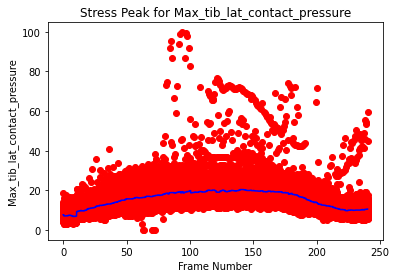

In [285]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Stress Peak for Max_tib_lat_contact_pressure ')
plt.xlabel('Frame Number')
plt.ylabel('Max_tib_lat_contact_pressure')
plt.show()

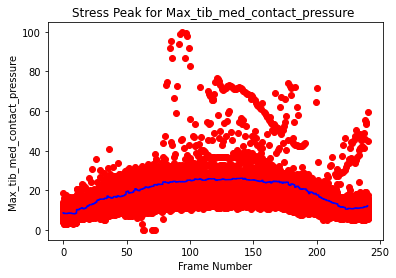

<Figure size 1440x1440 with 0 Axes>

In [340]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Stress Peak for Max_tib_med_contact_pressure ')
plt.xlabel('Frame Number')
plt.ylabel('Max_tib_med_contact_pressure')
plt.figure(figsize=(20, 20))
plt.show()

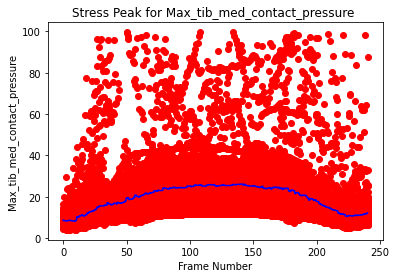

In [311]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Stress Peak for Max_tib_med_contact_pressure ')
plt.xlabel('Frame Number')
plt.ylabel('Max_tib_med_contact_pressure')
plt.show()

In [302]:
from sklearn.metrics import r2_score
y_pred= regressor.predict(X_test)
r2_score (y_test, y_pred)

0.3243225949209001

[link text](https://)